<a href="https://colab.research.google.com/github/Priyanshushaw1/ML-assignment/blob/main/Priyanshushaw1/ML-assignment/code/2_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_house=files.upload()

Saving housing_price_dataset.csv to housing_price_dataset (1).csv


In [ ]:
import pandas as pd
house_df = pd.read_csv('housing_price_dataset (1).csv')
house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
print(house_df.isnull().sum())
print(house_df.dtypes)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


In [ ]:
categorical_cols = house_df.select_dtypes(include=['object']).columns
house_df_encoded = pd.get_dummies(house_df, columns=categorical_cols)

In [ ]:
X = house_df_encoded.drop(columns=['Price'])
y = house_df_encoded['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Initialize and train Lasso model
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Initialize and train Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

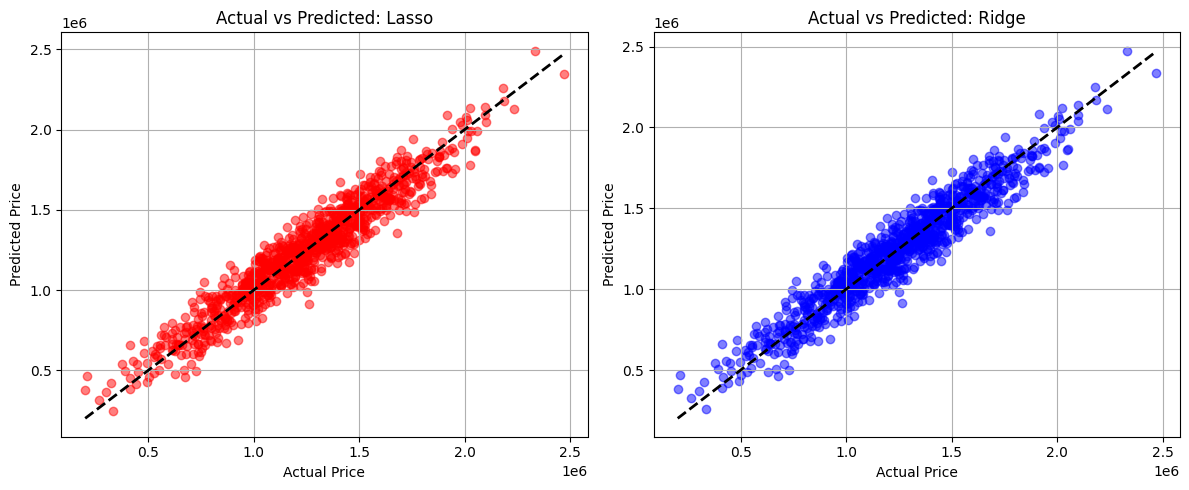

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Lasso subplot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted: Lasso')
plt.grid(True)

# Ridge subplot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted: Ridge')
plt.grid(True)

plt.tight_layout()
plt.show()